In [9]:
import numpy as np
from scipy.linalg import eigh
from numpy.linalg import inv
import matplotlib.pyplot as plt

In [2]:
def fun(t,A,w,phi):
    y = A * np.sin(w * t + phi)
    return y

In [8]:
t = np.arange(0,10,0.5)
y = fun(t,2.01,0.992,0.541)
print(t)
print(y)
y[0:4] = y[0:4] + 0.1
y[4:8] = y[4:8] -0.1
y[8:12] = y[8:12] -0.15
y[12:16] = y[12:16] + 0.1
y[16:19] = y[16:19] - 0.1
print(y)

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]
[ 1.03513682  1.73037219  2.00856447  1.80266554  1.16229984  0.24180416
 -0.73696959 -1.5381237  -1.96856921 -1.92456291 -1.41671092 -0.56741244
  0.41864011  1.30379473  1.87471719  1.99380745  1.63236316  0.87749727
 -0.08885733 -1.03379611]
[ 1.13513682  1.83037219  2.10856447  1.90266554  1.06229984  0.14180416
 -0.83696959 -1.6381237  -2.11856921 -2.07456291 -1.56671092 -0.71741244
  0.51864011  1.40379473  1.97471719  2.09380745  1.53236316  0.77749727
 -0.18885733 -1.03379611]


In [4]:
def j(t,A,w,phi):
    J = np.zeros([20,3])
    for i in range(20):
        j1 = - np.sin(w * t[i] + phi)
        j2 = - t[i] * A * np.cos(w * t[i] + phi)
        j3 = - A * np.cos(w * t[i] + phi)
        J[i][0] = j1
        J[i][1] = j2
        J[i][2] = j3
    return J

In [5]:
A = 1
w = 1
phi = 1
N = 3
mu = 0
for i in range(100):
    J = j(t,A,w,phi)
    #print('J:',J)
    H = np.dot(J.T,J)
    #print('H:',H)
    values,vectors = eigh(H,)
    if values[0] < 0:
        mu = - values[0] + 0.0001
    else:
        mu = 0
    H_inv = inv(H + mu * np.eye(N))
    #print('H_inv:',H_inv)
    tmp_r = fun(t,A,w,phi)
    r = y - tmp_r
    #print('r:',r)
    iteration_term = H_inv@(J.T)@(r.T)
    if (np.linalg.norm(iteration_term) <= 0.001):
        break
    A = A - iteration_term[0]
    w = w - iteration_term[1]
    phi = phi - iteration_term[2]
    #print('iteration_term:',iteration_term)

In [6]:
print(A,w,phi,i)

2.009971073311419 0.9920000011300744 0.5410056401278415 4


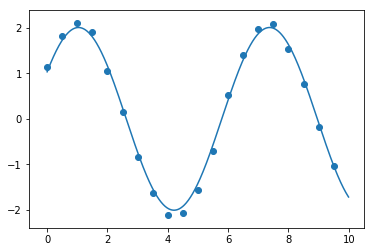

In [11]:
t1 = np.arange(0,10,0.01)
y1 = fun(t1,A,w,phi)
plt.plot(t1, y1)
plt.scatter(t, y)
plt.show()